In [17]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.neighbors import NearestNeighbors

In [18]:
music_info = pd.read_csv('/kaggle/input/million-song-dataset-spotify-lastfm/Music Info.csv')
music_info.head(5)

,track_id,name,artist,spotify_preview_url,spotify_id,tags,genre,year,duration_ms,danceability,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,TRIOREW128F424EAF0,Mr. Brightside,The Killers,https://p.scdn.co/mp3-preview/4d26180e6961fd46...,09ZQ5TmUG8TSL56n0knqrj,"rock, alternative, indie, alternative_rock, in...",NaN,2004,222200,0.355,...,1,-4.360,1,0.0746,0.001190,0.000000,0.0971,0.240,148.114,4
1,TRRIVDJ128F429B0E8,Wonderwall,Oasis,https://p.scdn.co/mp3-preview/d012e536916c927b...,06UfBBDISthj1ZJAtX4xjj,"rock, alternative, indie, pop, alternative_roc...",NaN,2006,258613,0.409,...,2,-4.373,1,0.0336,0.000807,0.000000,0.2070,0.651,174.426,4
2,TROUVHL128F426C441,Come as You Are,Nirvana,https://p.scdn.co/mp3-preview/a1c11bb1cb231031...,0keNu0t0tqsWtExGM3nT1D,"rock, alternative, alternative_rock, 90s, grunge",RnB,1991,218920,0.508,...,4,-5.783,0,0.0400,0.000175,0.000459,0.0878,0.543,120.012,4
3,TRUEIND128F93038C4,Take Me Out,Franz Ferdinand,https://p.scdn.co/mp3-preview/399c401370438be4...,0ancVQ9wEcHVd0RrGICTE4,"rock, alternative, indie, alternative_rock, in...",NaN,2004,237026,0.279,...,9,-8.851,1,0.0371,0.000389,0.000655,0.1330,0.490,104.560,4
4,TRLNZBD128F935E4D8,Creep,Radiohead,https://p.scdn.co/mp3-preview/e7eb60e9466bc3a2...,01QoK9DA7VTeTSE3MNzp4I,"rock, alternative, indie, alternative_rock, in...",RnB,2008,238640,0.515,...,7,-9.935,1,0.0369,0.010200,0.000141,0.1290,0.104,91.841,4


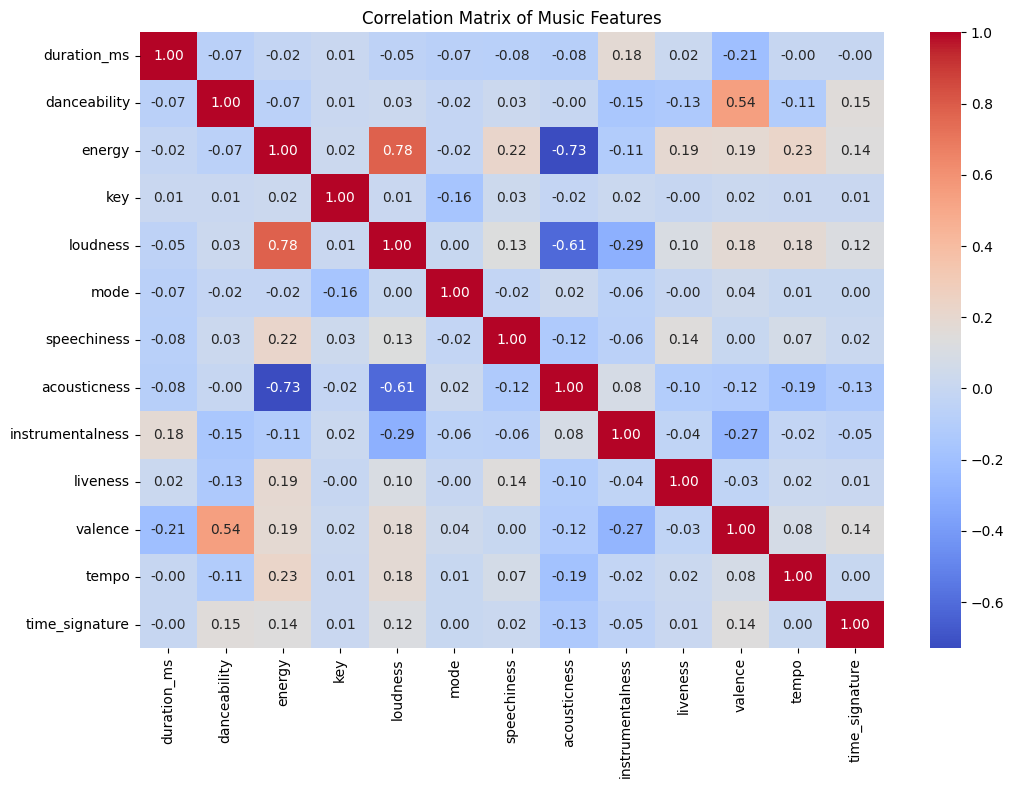

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

selected_columns = ['duration_ms', 'danceability', 'energy', 'key',
                    'loudness', 'mode', 'speechiness', 'acousticness', 
                    'instrumentalness', 'liveness', 'valence', 
                    'tempo', 'time_signature']

# Extract the relevant data from the DataFrame
music_data = music_info[selected_columns]

# Calculate the correlation matrix
correlation_matrix = music_data.corr()

# Plot the correlation matrix using seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Music Features')
plt.show()

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

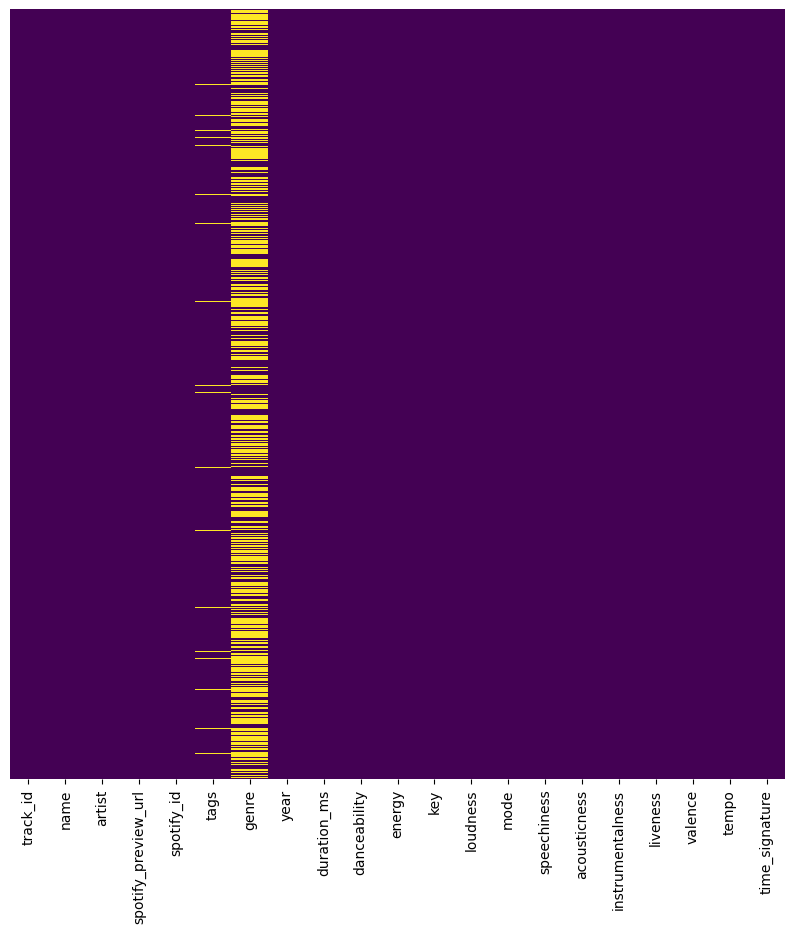

In [21]:
plt.figure(figsize = (10,10))
sns.heatmap(music_info.sample(n = 10000, random_state = 1).isnull(), cmap  = 'viridis', cbar = False, yticklabels = False,
            # xticklabels= False
            )
plt.show()

#  SIMILAR ITEM RECOMMENDATION WITHOUT THE INTERACTION FILE

In [22]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [23]:
df = music_info.drop(["name", "spotify_preview_url", "spotify_id", "tags"], axis=1)

In [24]:
df['genre'] = df['genre'].fillna(0)
# Perform one-hot encoding on the 'genre' column
df_encoded = pd.get_dummies(df, columns=['genre'], prefix=['genre'])
df_encoded.head()

,track_id,artist,year,duration_ms,danceability,energy,key,loudness,mode,speechiness,...,genre_Latin,genre_Metal,genre_New Age,genre_Pop,genre_Punk,genre_Rap,genre_Reggae,genre_RnB,genre_Rock,genre_World
0,TRIOREW128F424EAF0,The Killers,2004,222200,0.355,0.918,1,-4.360,1,0.0746,...,False,False,False,False,False,False,False,False,False,False
1,TRRIVDJ128F429B0E8,Oasis,2006,258613,0.409,0.892,2,-4.373,1,0.0336,...,False,False,False,False,False,False,False,False,False,False
2,TROUVHL128F426C441,Nirvana,1991,218920,0.508,0.826,4,-5.783,0,0.0400,...,False,False,False,False,False,False,False,True,False,False
3,TRUEIND128F93038C4,Franz Ferdinand,2004,237026,0.279,0.664,9,-8.851,1,0.0371,...,False,False,False,False,False,False,False,False,False,False
4,TRLNZBD128F935E4D8,Radiohead,2008,238640,0.515,0.430,7,-9.935,1,0.0369,...,False,False,False,False,False,False,False,True,False,False


In [25]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to the 'artist' column
df_encoded['artist'] = label_encoder.fit_transform(df_encoded['artist'])
df_encoded.head()

,track_id,artist,year,duration_ms,danceability,energy,key,loudness,mode,speechiness,...,genre_Latin,genre_Metal,genre_New Age,genre_Pop,genre_Punk,genre_Rap,genre_Reggae,genre_RnB,genre_Rock,genre_World
0,TRIOREW128F424EAF0,7209,2004,222200,0.355,0.918,1,-4.360,1,0.0746,...,False,False,False,False,False,False,False,False,False,False
1,TRRIVDJ128F429B0E8,5262,2006,258613,0.409,0.892,2,-4.373,1,0.0336,...,False,False,False,False,False,False,False,False,False,False
2,TROUVHL128F426C441,5194,1991,218920,0.508,0.826,4,-5.783,0,0.0400,...,False,False,False,False,False,False,False,True,False,False
3,TRUEIND128F93038C4,2672,2004,237026,0.279,0.664,9,-8.851,1,0.0371,...,False,False,False,False,False,False,False,False,False,False
4,TRLNZBD128F935E4D8,5740,2008,238640,0.515,0.430,7,-9.935,1,0.0369,...,False,False,False,False,False,False,False,True,False,False


In [26]:
df_encoded.replace({True: 1, False: 0}, inplace=True)
df_encoded.head()

/tmp/ipykernel_215/3951474294.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_encoded.replace({True: 1, False: 0}, inplace=True)


,track_id,artist,year,duration_ms,danceability,energy,key,loudness,mode,speechiness,...,genre_Latin,genre_Metal,genre_New Age,genre_Pop,genre_Punk,genre_Rap,genre_Reggae,genre_RnB,genre_Rock,genre_World
0,TRIOREW128F424EAF0,7209,2004,222200,0.355,0.918,1,-4.360,1,0.0746,...,0,0,0,0,0,0,0,0,0,0
1,TRRIVDJ128F429B0E8,5262,2006,258613,0.409,0.892,2,-4.373,1,0.0336,...,0,0,0,0,0,0,0,0,0,0
2,TROUVHL128F426C441,5194,1991,218920,0.508,0.826,4,-5.783,0,0.0400,...,0,0,0,0,0,0,0,1,0,0
3,TRUEIND128F93038C4,2672,2004,237026,0.279,0.664,9,-8.851,1,0.0371,...,0,0,0,0,0,0,0,0,0,0
4,TRLNZBD128F935E4D8,5740,2008,238640,0.515,0.430,7,-9.935,1,0.0369,...,0,0,0,0,0,0,0,1,0,0


In [27]:
df_encoded.columns

Index(['track_id', 'artist', 'year', 'duration_ms', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'genre_0', 'genre_Blues', 'genre_Country', 'genre_Electronic',
       'genre_Folk', 'genre_Jazz', 'genre_Latin', 'genre_Metal',
       'genre_New Age', 'genre_Pop', 'genre_Punk', 'genre_Rap', 'genre_Reggae',
       'genre_RnB', 'genre_Rock', 'genre_World'],
      dtype='object')

In [28]:
df_encoded[["key", "time_signature"]].head(10)

,key,time_signature
0,1,4
1,2,4
2,4,4
3,9,4
4,7,4
5,10,4
6,8,4
7,7,4
8,5,4
9,5,4


In [29]:
df_encoded["time_signature"].unique()

array([4, 3, 5, 1, 0])

In [60]:
df_encoded.drop(["genre_0"], axis=1)

,track_id,artist,year,duration_ms,danceability,energy,key,loudness,mode,speechiness,...,genre_Latin,genre_Metal,genre_New Age,genre_Pop,genre_Punk,genre_Rap,genre_Reggae,genre_RnB,genre_Rock,genre_World
0,TRIOREW128F424EAF0,7209,2004,0.057868,0.360041,0.918,0.090909,0.874265,1.0,0.078197,...,0,0,0,0,0,0,0,0,0,0
1,TRRIVDJ128F429B0E8,5262,2006,0.067412,0.414807,0.892,0.181818,0.874061,1.0,0.035220,...,0,0,0,0,0,0,0,0,0,0
2,TROUVHL128F426C441,5194,1991,0.057008,0.515213,0.826,0.363636,0.851906,0.0,0.041929,...,0,0,0,0,0,0,0,1,0,0
3,TRUEIND128F93038C4,2672,2004,0.061754,0.282961,0.664,0.818182,0.803699,1.0,0.038889,...,0,0,0,0,0,0,0,0,0,0
4,TRLNZBD128F935E4D8,5740,2008,0.062177,0.522312,0.430,0.636364,0.786666,1.0,0.038679,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50678,TRQYCFV128F9322F50,8292,2008,0.071299,0.444219,0.933,0.545455,0.894661,0.0,0.172956,...,0,0,0,0,0,0,0,0,0,0
50679,TRHQCSH128F42724B7,104,2004,0.071743,0.355984,0.693,0.000000,0.835753,1.0,0.125786,...,0,0,0,0,0,0,0,0,0,0
50680,TRZRODK128F92D68D7,8236,2014,0.066420,0.440162,0.975,0.909091,0.894189,0.0,0.280922,...,0,0,0,0,0,0,0,0,0,0
50681,TRGLMEM128F9322F63,8292,2008,0.063397,0.520284,0.902,0.363636,0.881273,0.0,0.055556,...,0,0,0,0,0,0,0,0,0,0


In [30]:
# Columns to standardize
columns_to_standardize = [
    'duration_ms', 'danceability', 'energy', 'key',
    'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
    'liveness', 'valence', 'tempo', 'time_signature'
]

# Initialize the scaler
scaler = MinMaxScaler()

# Fit and transform the selected columns
df_encoded[columns_to_standardize] = scaler.fit_transform(df_encoded[columns_to_standardize])

In [31]:
df_encoded.head(5)

,track_id,artist,year,duration_ms,danceability,energy,key,loudness,mode,speechiness,...,genre_Latin,genre_Metal,genre_New Age,genre_Pop,genre_Punk,genre_Rap,genre_Reggae,genre_RnB,genre_Rock,genre_World
0,TRIOREW128F424EAF0,7209,2004,0.057868,0.360041,0.918,0.090909,0.874265,1.0,0.078197,...,0,0,0,0,0,0,0,0,0,0
1,TRRIVDJ128F429B0E8,5262,2006,0.067412,0.414807,0.892,0.181818,0.874061,1.0,0.035220,...,0,0,0,0,0,0,0,0,0,0
2,TROUVHL128F426C441,5194,1991,0.057008,0.515213,0.826,0.363636,0.851906,0.0,0.041929,...,0,0,0,0,0,0,0,1,0,0
3,TRUEIND128F93038C4,2672,2004,0.061754,0.282961,0.664,0.818182,0.803699,1.0,0.038889,...,0,0,0,0,0,0,0,0,0,0
4,TRLNZBD128F935E4D8,5740,2008,0.062177,0.522312,0.430,0.636364,0.786666,1.0,0.038679,...,0,0,0,0,0,0,0,1,0,0


In [49]:
scaled_data = scaler.fit_transform(df_encoded[['artist', 'year']])

# Multiply the scaled data by the desired factor (e.g., 10)
multiplied_scaled_data = scaled_data * 10

In [50]:
# Drop 'track_id' as it's not a feature for similarity computation
features = df_encoded.drop(columns=['track_id'])

# Initialize the KNN model
# For similarity tasks, NearestNeighbors is often used
knn = NearestNeighbors(n_neighbors=10, metric='euclidean')  # You can adjust n_neighbors

# Fit the model
knn.fit(features)

NearestNeighbors(metric='euclidean', n_neighbors=10)

In [51]:
# Save the DataFrame to a CSV file
df_encoded.to_csv('df_encoded.csv', index=False)

In [52]:
import pickle
with open('knn_model.pkl', 'wb') as f:
    pickle.dump(knn, f)

In [36]:
import pickle
with open('knn_model.pkl', 'rb') as f:
    knn = pickle.load(f)

In [53]:
# Function to recommend similar tracks
def recommend_similar_tracks(track_id, df, model, n_neighbors=5):
    # Find the index of the given track_id
    try:
        track_index = df[df['track_id'] == track_id].index[0]
    except IndexError:
        print(f"Track ID {track_id} not found in the dataset.")
        return []

    # Get the row index of the specified track_id
    track_index = df_encoded[df_encoded['track_id'] == track_id].index[0]

    # Extract the feature vector using .iloc to get the row by index
    feature_vector = df_encoded.drop(columns=['track_id']).iloc[track_index]

    # Convert the Series to a DataFrame to retain feature names
    feature_vector_df = feature_vector.to_frame().transpose()

    # Find the nearest neighbors
    distances, indices = model.kneighbors(feature_vector_df)

    # Exclude the input track itself from the results
    similar_indices = indices[0][1:n_neighbors + 1]

    # Get the track IDs of similar tracks
    similar_tracks = df.iloc[similar_indices]['track_id']
    
    return similar_tracks.tolist(),distances

In [54]:
def vizualize(track_id,df_encoded):
     # Get similar tracks using your function
    similar_tracks, distances = recommend_similar_tracks(track_id, df_encoded, knn, n_neighbors=5)

    # Print the list of similar tracks
    print("Similar tracks for",track_id," : ", similar_tracks)
    print("Calculated distances for",track_id," : ", distances)

    # Filter the DataFrame to include only the rows with track IDs in the similar_tracks list
    specific_rows_df = df_encoded[df_encoded['track_id'].isin(similar_tracks)]

    # Print the filtered DataFrame
    print(specific_rows_df.T.head(100))

**Manual Inspection: Check if the recommended items are indeed similar to the query item.**

In [39]:
recommend_similar_tracks("TRUWPXO12903CDCE50",df_encoded,knn)

(['TRYNJVS128F423EBCC',
  'TRSIZOL128E0780D6D',
  'TRJOUIT128F92FF2A4',
  'TRCCGAP128F424EBBB',
  'TRLNAND128E078894A'],
 array([[0.        , 0.3328245 , 1.57552291, 1.74202168, 1.77199984,
         1.77354882, 1.80386606, 1.80720783, 1.80868915, 1.90327704]]))

In [58]:
vizualize("TRLNAND128E078894A",df_encoded)

Similar tracks for TRLNAND128E078894A  :  ['TRQDDKR128F423F035', 'TROWWZL12903CD4445', 'TRNNGMK128F423F034', 'TRSIZOL128E0780D6D', 'TRPFFVC128E0780CA1']
Calculated distances for TRLNAND128E078894A  :  [[0.         0.43209229 1.06716868 1.14371856 1.27533769 1.48092317
  1.49341342 1.5009783  1.56447752 1.6252001 ]]
                               43                  3763                3985   \
track_id          TRNNGMK128F423F034  TRSIZOL128E0780D6D  TRQDDKR128F423F035   
artist                          5599                5600                5599   
year                            2005                2004                2004   
duration_ms                 0.059937            0.056274            0.073004   
danceability                0.521298             0.34787            0.610548   
energy                         0.435               0.901               0.777   
key                         0.363636            0.090909            0.363636   
loudness                    0.730382       

In [41]:
def get_track_details(df, track_id):
    """
    Function to get the 'name', 'artist', and 'year' attributes of a track given its track_id.
    
    Parameters:
    df (pd.DataFrame): DataFrame containing track details.
    track_id (str): The track_id for which details are to be retrieved.
    
    Returns:
    dict: A dictionary containing 'name', 'artist', and 'year' of the track, or None if not found.
    """
    #print(f"Looking for track_id: {track_id}")  # Debug print
    track_row = df[df['track_id'] == track_id]
    
    if not track_row.empty:
        track_details = {
            'name': track_row['name'].values[0],
            'artist': track_row['artist'].values[0],
            'year': track_row['year'].values[0]
        }
        return track_details
    else:
        print(f"Track ID {track_id} not found in the music_info DataFrame.")
        return None


In [42]:
get_track_details(music_info, "TRUWPXO12903CDCE50")

{'name': '36 Degrees', 'artist': 'Placebo', 'year': 2004}

In [43]:
track_id_list=df_encoded['track_id'].unique().tolist()

In [44]:
from tqdm import tqdm

def write_to_file(df_encoded, music_info, knn, n_neighbors):
    """
    Function to write details about tracks and their similar tracks to a text file.

    Parameters:
    df_encoded (pd.DataFrame): DataFrame containing track information and features for similarity.
    music_info (pd.DataFrame): DataFrame containing detailed information about tracks.
    knn (NearestNeighbors): Fitted KNN model for finding similar tracks.
    n_neighbors (int): Number of similar tracks to recommend.
    """
    
    track_id_list = df_encoded['track_id'].unique().tolist()
    print("# of ids: ", len(track_id_list))
    
    try:
        with open("similar.txt", 'w') as file:
            # Use tqdm to add a progress bar
            for item in tqdm(track_id_list, desc="Writing Similar Tracks to File", unit="track"):
                # Get similar tracks
                new_items = recommend_similar_tracks(item, df_encoded, knn, n_neighbors)
                
                # Get details of the current track
                dic = get_track_details(music_info, item)
                
                if dic:
                    # Write the current track's details and similar tracks to the file
                    file.write(f"\nSimilar tracks to {dic['name']} by {dic['artist']} ({dic['year']}):\n")
                    for sim_item in new_items[0]:
                        sim_details = get_track_details(music_info, sim_item)
                        if sim_details:
                            file.write(f"{sim_details['name']} by {sim_details['artist']} ({sim_details['year']}), ")
                    
                    # Add a newline for better readability
                    file.write("\n")
    
    except IOError as e:
        print(f"Error writing to file: {e}")


In [45]:
dic = get_track_details(music_info, str("TRIOREW128F424EAF0"))

In [46]:
dic['name']

'Mr. Brightside'

In [47]:
# # Example usage:
# write_to_file(df_encoded,music_info,knn,5)

## Formally combining as a model

In [144]:
class SimilarItemRec:
    def __init__(self):
        """Call this function to initialize the model, Note: U hv to train the model(fit) before using"""
        self.model=None
        self.raw_df=None
        self.encoded_df=None
        self.label_encoder=None
        self.artist_weight=None
        self.year_weight=None

    def fit(self):
        """fit the model"""
        # Drop 'track_id' as it's not a feature for similarity computation
        features = self.encoded_df.drop(columns=['track_id'])

        # Initialize the KNN model
        # For similarity tasks, NearestNeighbors is often used
        knn = NearestNeighbors(n_neighbors=10, metric='euclidean')  # You can adjust n_neighbors

        # Fit the model
        knn.fit(features)
        self.model=knn

    def train(self, train_df,artist_weight=500,year_weight=50):
        """Train the model, attributes, music_info_df and artist_weight = weight on the artist attribute when selecting similar files, default is 50, to nprmalize the effect set to 1,
          year_weight = weight on the year attribute when selecting similar files, default is 500, to nprmalize the effect set to 1
          """
        self.raw_df=train_df
        df = train_df.drop(["name", "spotify_preview_url", "spotify_id", "tags"], axis=1)
        df['genre'] = df['genre'].fillna(0)
        # Perform one-hot encoding on the 'genre' column
        df_encoded = pd.get_dummies(df, columns=['genre'], prefix=['genre'])
        # Initialize the LabelEncoder
        self.label_encoder = LabelEncoder()
        # Apply label encoding to the 'artist' column
        df_encoded['artist'] = self.label_encoder.fit_transform(df_encoded['artist'])
        # Enable the future behavior explicitly
        pd.set_option('future.no_silent_downcasting', True)
        df_encoded.replace({True: 1, False: 0}, inplace=True)
        df_encoded.drop(["genre_0"], axis=1)
        # Columns to standardize
        columns_to_standardize = [
            'duration_ms', 'danceability', 'energy', 'key',
            'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
            'liveness', 'valence', 'tempo', 'time_signature'
        ]
        # Initialize the scaler
        scaler = MinMaxScaler()
        # Fit and transform the selected columns
        df_encoded[columns_to_standardize] = scaler.fit_transform(df_encoded[columns_to_standardize])
        
        scaled_artist = scaler.fit_transform(df_encoded[['artist']])
        scaled_year =scaler.fit_transform(df_encoded[['year']])

        # Multiply the scaled data by the desired factor (e.g., 10)
        df_encoded[['artist']]=scaled_artist*artist_weight
        df_encoded[['year']]=scaled_year*year_weight
        self.artist_weight = artist_weight
        self.year_weight=year_weight
        self.encoded_df=df_encoded
        self.fit()
    

    def get_recommendations(self,track_id, n_recommendations=5):
        """Recommend n songs for a user based of knn algo."""
        # Find the index of the given track_id
        try:
            track_index = self.encoded_df[self.encoded_df['track_id'] == track_id].index[0]
        except IndexError:
            print(f"Track ID {track_id} not found in the dataset.")
            return []

        # Extract the feature vector using .iloc to get the row by index
        feature_vector = self.encoded_df.drop(columns=['track_id']).iloc[track_index]

        # Convert the Series to a DataFrame to retain feature names
        feature_vector_df = feature_vector.to_frame().transpose()

        # Find the nearest neighbors
        distances, indices = self.model.kneighbors(feature_vector_df)

        # Exclude the input track itself from the results
        similar_indices = indices[0][1:n_recommendations + 1]

        # Get the track IDs of similar tracks
        similar_tracks = df.iloc[similar_indices]['track_id']

        return similar_tracks.tolist(),distances

    def vizualize(self,track_id):
        """vizualize the similarity, of the model"""
         # Get similar tracks using your function
        similar_tracks, distances = self.get_recommendations(track_id, n_recommendations=5)

        # Print the list of similar tracks
        print("Similar tracks for",track_id," : ", similar_tracks)
        print("Calculated distances for",track_id," : ", distances)

        # Filter the DataFrame to include only the rows with track IDs in the similar_tracks list
        specific_rows_df = self.raw_df[self.raw_df['track_id'].isin(similar_tracks)]

        # Print the filtered DataFrame
        print(specific_rows_df.T.head(100))

    def update(self,new_music_df):
        """Üpdate the model with the latest music_infos, note: it should contain all the attributes as in the music_info file"""
        new_raw_df = pd.concat([self.raw_df, new_music_df], ignore_index=True)
        self.raw_df=new_raw_df
        df = new_music_df.drop(["name", "spotify_preview_url", "spotify_id", "tags"], axis=1)
        df['genre'] = df['genre'].fillna(0)
        # Perform one-hot encoding on the 'genre' column
        df = pd.get_dummies(df, columns=['genre'], prefix=['genre'])
        # Apply label encoding to the 'artist' column
        df['artist'] = self.label_encoder.fit_transform(df['artist'])
        df.replace({True: 1, False: 0}, inplace=True)
        # List of required columns
        required_columns = [
            'genre_0', 'genre_Blues', 'genre_Country', 'genre_Electronic',
            'genre_Folk', 'genre_Jazz', 'genre_Latin', 'genre_Metal',
            'genre_New Age', 'genre_Pop', 'genre_Punk', 'genre_Rap', 'genre_Reggae',
            'genre_RnB', 'genre_Rock', 'genre_World'
        ]

        # Check if each required column exists, and if not, create it with default value of 0
        for column in required_columns:
            if column not in df.columns:
                df[column] = 0

        df.drop(["genre_0"], axis=1)
        # Columns to standardize
        columns_to_standardize = [
            'duration_ms', 'danceability', 'energy', 'key',
            'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
            'liveness', 'valence', 'tempo', 'time_signature'
        ]
        # Initialize the scaler
        scaler = MinMaxScaler()
        # Fit and transform the selected columns
        df[columns_to_standardize] = scaler.fit_transform(df[columns_to_standardize])
        
        scaled_artist = scaler.fit_transform(df[['artist']])
        scaled_year =scaler.fit_transform(df[['year']])

        # Multiply the scaled data by the desired factor (e.g., 10)
        df[['artist']]=scaled_artist*self.artist_weight
        df[['year']]=scaled_year*self.year_weight
        df_encoded = pd.concat([self.encoded_df, df], ignore_index=True)

        self.encoded_df=df_encoded
        self.fit()
        
    def get_track_details(self, track_id):
        """
        Function to get the 'name', 'artist', and 'year' attributes of a track given its track_id.

        Parameters:
        df (pd.DataFrame): DataFrame containing track details.
        track_id (str): The track_id for which details are to be retrieved.

        Returns:
        dict: A dictionary containing 'name', 'artist', and 'year' of the track, or None if not found.
        """
        #print(f"Looking for track_id: {track_id}")  # Debug print
        track_row = self.raw_df[self.encoded_df['track_id'] == track_id]

        if not track_row.empty:
            track_details = {
                'name': track_row['name'].values[0],
                'artist': track_row['artist'].values[0],
                'year': track_row['year'].values[0]
            }
            return track_details
        else:
            print(f"Track ID {track_id} not found in the music_info DataFrame.")
            return None

    def get_full_recommendations(self,track_id):
        """get the recommendations with attributes"""
        recmmended_list=self.get_recommendations(track_id)
        print("Recommended songs for track_id : ",track_id)
        for track in recmmended_list[0]:
            print(self.get_track_details(track))

## Checking the model

In [132]:
model=SimilarItemRec()

In [133]:
model.train(music_info)

In [141]:
model.get_recommendations("TRUWPXO12903CDCE50")[0]

['TRYNJVS128F423EBCC',
 'TRFPZUI128F932B5E1',
 'TRWFWQT128F429B043',
 'TRGYJQS128F429B04C',
 'TRNBBSY12903CBB070']

In [143]:
model.get_full_recommendations("TRUWPXO12903CDCE50")

Recommended songs for track_id :  TRUWPXO12903CDCE50
{'name': 'This Picture', 'artist': 'Placebo', 'year': 2004}
{'name': 'Sad Story', 'artist': "Plain White T's", 'year': 2005}
{'name': 'All That We Needed', 'artist': "Plain White T's", 'year': 2005}
{'name': 'Lazy Day Afternoon', 'artist': "Plain White T's", 'year': 2005}
{'name': 'Learning to Fly', 'artist': 'Pink Floyd', 'year': 2004}


In [137]:
new_songs = music_info.copy().sample(frac=0.05, random_state=42).reset_index(drop=True) # just an example for the demonstration

In [138]:
model.update(new_songs)

In [118]:
model.vizualize("TRUWPXO12903CDCE50")

Similar tracks for TRUWPXO12903CDCE50  :  ['TRYNJVS128F423EBCC', 'TRFPZUI128F932B5E1', 'TRWFWQT128F429B043', 'TRGYJQS128F429B04C', 'TRNBBSY12903CBB070']
Calculated distances for TRUWPXO12903CDCE50  :  [[5.39479661e-06 3.32824508e-01 5.01732255e-01 6.15838474e-01
  8.87081490e-01 1.05794551e+00 1.12216669e+00 1.17212327e+00
  1.18737744e+00 1.19502209e+00]]
                                                                 1053   \
track_id                                            TRYNJVS128F423EBCC   
name                                                      This Picture   
artist                                                         Placebo   
spotify_preview_url  https://p.scdn.co/mp3-preview/382b4be52cde49ea...   
spotify_id                                      0LPCpE9wIttOa1esxIbh6T   
tags                 rock, alternative, indie, alternative_rock, in...   
genre                                                              NaN   
year                                             